In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sympy import *
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
%matplotlib inline

# Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# a) решение

from scipy.spatial.distance import cosine

dists = []
lines = len(raitings)
i = 0


for i in range(lines):
    index = [x for x in range(len(raitings))]
    index.pop(i)
    for j in index:
        dists.append({"number_user": i, "distance": round(cosine(raitings[i], raitings[j]), 2), "number_similar_user": j})


In [4]:
for element in dists:
    for i in range(lines):
        if element['number_user'] == i and element['distance'] == min([el['distance'] for el in dists if el['number_user'] == i]):
            print(f"Пара схожих пользователей: {element['number_user']} - {element['number_similar_user']}, значение косинусной метрики: {element['distance']} .")
        

Пара схожих пользователей: 0 - 8, значение косинусной метрики: 0.09 .
Пара схожих пользователей: 1 - 4, значение косинусной метрики: 0.13 .
Пара схожих пользователей: 2 - 9, значение косинусной метрики: 0.08 .
Пара схожих пользователей: 3 - 9, значение косинусной метрики: 0.14 .
Пара схожих пользователей: 4 - 8, значение косинусной метрики: 0.12 .
Пара схожих пользователей: 5 - 9, значение косинусной метрики: 0.14 .
Пара схожих пользователей: 6 - 1, значение косинусной метрики: 0.17 .
Пара схожих пользователей: 6 - 3, значение косинусной метрики: 0.17 .
Пара схожих пользователей: 6 - 7, значение косинусной метрики: 0.17 .
Пара схожих пользователей: 7 - 5, значение косинусной метрики: 0.16 .
Пара схожих пользователей: 7 - 9, значение косинусной метрики: 0.16 .
Пара схожих пользователей: 8 - 0, значение косинусной метрики: 0.09 .
Пара схожих пользователей: 9 - 2, значение косинусной метрики: 0.08 .


In [5]:
min([el['distance'] for el in dists if el['number_user'] == 0])

0.09

In [6]:
# b) для понижение размерности можем использовать метод минимальных компонент

from sklearn.decomposition import PCA

pca = PCA(n_components=5) # создаем модель PCA

"""Уменьшаем количество атрибутов матрицы, проецируя все атрибуты в новое пространство, 
составленное методом минимальных компонент (всего выбрано 5 самых важных признака для пространства)"""

raitings_5 = pca.fit_transform(raitings)

# получаем матрицу новой размерности
raitings_5

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [7]:
# b) для понижение размерности можем использовать метод сингулярного разложения

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

raitings_5_SVD = svd.fit_transform(raitings)
raitings_5_SVD

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

# Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [8]:
x, y = symbols('x y')
function = tan(sin(x) + cos(2*x + 3))**2
dif_1 = diff(function, x)
print("Первая производная : {}".format(dif_1))

Первая производная : 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [9]:
x = symbols('x')
dif_1 = round(diff(function, x).evalf(subs={'x':1}), 3)
print("Значение первой производная : {}".format(dif_1))

Значение первой производная : 55.386


# Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [10]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [11]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [12]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

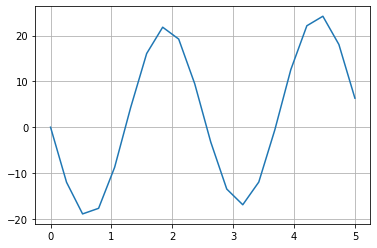

In [13]:
plt.plot(x, fx)
plt.grid(True)
plt.show()

In [20]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [21]:
# используем метод COBYLA

print(minimize(error, [0, 0], method='COBYLA'))

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])


In [16]:
res = differential_evolution(error, [(-3, 3), (-3, 3)], disp=True)
res

differential_evolution step 1: f(x)= 99.9163
differential_evolution step 2: f(x)= 3.47816
differential_evolution step 3: f(x)= 3.47816
differential_evolution step 4: f(x)= 3.47816
differential_evolution step 5: f(x)= 3.47816
differential_evolution step 6: f(x)= 3.47816
differential_evolution step 7: f(x)= 3.47816
differential_evolution step 8: f(x)= 3.47816
differential_evolution step 9: f(x)= 3.47816
differential_evolution step 10: f(x)= 3.47816
differential_evolution step 11: f(x)= 3.47816
differential_evolution step 12: f(x)= 3.47816
differential_evolution step 13: f(x)= 3.47816
differential_evolution step 14: f(x)= 1.75331
differential_evolution step 15: f(x)= 1.75331
differential_evolution step 16: f(x)= 0.279729
differential_evolution step 17: f(x)= 0.121182
differential_evolution step 18: f(x)= 0.121182
differential_evolution step 19: f(x)= 0.121182
differential_evolution step 20: f(x)= 0.121182
differential_evolution step 21: f(x)= 0.121182
differential_evolution step 22: f(x)=

     fun: 1.5140373550437403e-06
     jac: array([-157.82462713,  502.30051162])
 message: 'Optimization terminated successfully.'
    nfev: 2160
     nit: 69
 success: True
       x: array([ 3. , -2.5])

In [22]:
bounds = [(-5, 5), (-25, 25)]
result = differential_evolution(error, bounds)
result.x, result.fun

(array([ 3. , -2.5]), 1.511843073842556e-06)

### Иные подходы 

In [227]:
print(minimize(error, [0, 0]))

      fun: 235.780576107677
 hess_inv: array([[ 0.02102185, -0.01394762],
       [-0.01394762,  0.009254  ]])
      jac: array([-0.14583778,  9.27736664])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 373
      nit: 8
     njev: 122
   status: 2
  success: False
        x: array([2.42995925, 0.20160452])


In [228]:
print(minimize(error, [0, 0], method='BFGS'))

      fun: 235.780576107677
 hess_inv: array([[ 0.02102185, -0.01394762],
       [-0.01394762,  0.009254  ]])
      jac: array([-0.14583778,  9.27736664])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 373
      nit: 8
     njev: 122
   status: 2
  success: False
        x: array([2.42995925, 0.20160452])


In [229]:
print(minimize(error, [0, 0], method='Nelder-Mead'))

 final_simplex: (array([[3.57553805, 0.06176556],
       [3.57396564, 0.06186185],
       [3.57000894, 0.06211407]]), array([234.98593543, 234.98624915, 234.98634789]))
           fun: 234.98593543245534
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 400
           nit: 223
        status: 1
       success: False
             x: array([3.57553805, 0.06176556])


# Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [23]:
def y():
    return np.random.randint(0, 250, size = 20)

y()

array([173, 108,   6,  40,  69, 184,  56, 162, 249, 132, 231,  92, 194,
       207, 146, 188,  97,  88, 197, 238])

(array([  7.,  12.,  84., 151., 238., 244., 158.,  75.,  24.,   7.]),
 array([ 6.78 ,  7.318,  7.856,  8.394,  8.932,  9.47 , 10.008, 10.546,
        11.084, 11.622, 12.16 ]),
 <BarContainer object of 10 artists>)

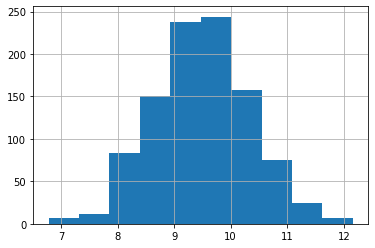

In [24]:
# Построим  график распределения ДСВ:

y_mean = [ np.mean(np.random.randint(0, 20, size = 50)) for v in range(1000) ]
plt.grid()
plt.hist(y_mean)


# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [258]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [264]:
# собственные числа (значения) и собственные векторы квадратной матрицы
w, v = LA.eig(m)

In [265]:
# собственные числа (значения) квадратной матрицы
w

array([ 3., -1.])

In [266]:
#  собственные векторы квадратной матрицы
v

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [267]:
# проверка

np.dot(m, v)

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

In [268]:
# проверка

w * v

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

# Сохраненный код для себя

Данный код не нужно проверять, элементы кода использовались при поиски решения, код сохранен для дальнейшего изучения

In [193]:
# задание 1

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

list_cosine = pairwise_distances(raitings, raitings, metric='cosine')

list_cosine

In [ ]:
index_min = []
for i in range(lines):
    non_zero_a = np.nonzero(list_cosine[i])
    index_min.append(np.argmin(list_cosine[i][non_zero_a]))

In [ ]:
non_zero_a = np.nonzero(list_cosine[0])
non_zero_a

In [ ]:
index_min

In [ ]:
list_cosine[non_zero_a]